In [ ]:
### SAMPLE ROBOFLY FOURIER SERIES 
#PHASE SHIFT COEFFICIENTS


In [3]:
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
import numpy as np

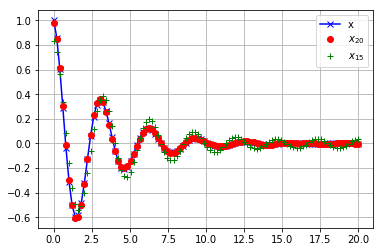

In [4]:
N = 100
t = np.linspace(0,20,N)
x = np.exp(-t/3)*np.cos(2*t)
y = dct(x, norm='ortho')
window = np.zeros(N)
window[:20] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)
#0.0010901402257
plt.plot(t, x, '-bx')
plt.plot(t, yr, 'ro')
window = np.zeros(N)
window[:15] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)
#0.0718818065008
plt.plot(t, yr, 'g+')
plt.legend(['x', '$x_{20}$', '$x_{15}$'])
plt.grid()
plt.show()

In [9]:
#time = 40

def cn(n):
   c = y*np.exp(-1j*2*n*np.pi*time/period)
   return c.sum()/c.size

def f(x, Nh):
   f = np.array([2*cn(i)*np.exp(1j*2*i*np.pi*x/period) for i in range(1,Nh+1)])
   return f.sum()

#y2 = np.array([f(t,50).real for t in time])

#plot(time, y)
#plot(time, y2)

In [11]:
# must start notebook with --pylab flag

from __future__ import  division
from matplotlib.patches import FancyArrow
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.gridspec as gridspec

In [24]:
def dftmatrix(Nfft=32,N=None):
    'construct DFT matrix'
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n = np.arange(N)
    U = np.matrix(np.exp(1j* 2*np.pi/Nfft *k*n[:,None])) # use numpy broadcasting to create matrix
    return U/np.sqrt(Nfft)

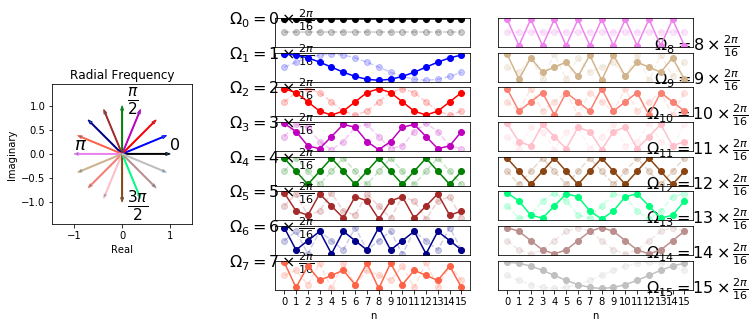

In [33]:
Nfft=16
v = np.ones((16,1))
U = dftmatrix(Nfft=Nfft,N=16)

U=dftmatrix()


# --- 
# hardcoded constants to format complicated figure

gs = gridspec.GridSpec(8,12)
gs.update( wspace=1, left=0.01)

fig = plt.figure(figsize=(10,5))
ax0 = plt.subplot(gs[:,:3])
fig.add_subplot(ax0)

ax0.set_aspect(1)
a=2*np.pi/Nfft*np.arange(Nfft)

colors = ['k','b','r','m','g','Brown','DarkBlue','Tomato','Violet', 'Tan','Salmon','Pink',
          'SaddleBrown', 'SpringGreen', 'RosyBrown','Silver',]
for j,i in enumerate(a):
  ax0.add_patch( FancyArrow(0,0,np.cos(i),np.sin(i),width=0.02,
                            length_includes_head=True,edgecolor=colors[j]))

ax0.text(1,0.1,'0',fontsize=16)
ax0.text(0.1,1,r'$\frac{\pi}{2}$',fontsize=22)
ax0.text(-1,0.1,r'$\pi$',fontsize=18)
ax0.text(0.1,-1.2,r'$\frac{3\pi}{2}$',fontsize=22)
ax0.axis(np.array([-1,1,-1,1])*1.45)
ax0.set_title('Radial Frequency')
ax0.set_xlabel('Real')
ax0.set_ylabel('Imaginary')

# plots in the middle column
for i in range(8):
  ax=plt.subplot(gs[i,4:8])
  ax.set_xticks([]);  ax.set_yticks([])
  ax.set_ylabel(r'$\Omega_{%d}=%d\times\frac{2\pi}{16}$'%(i,i),fontsize=16,
                rotation='horizontal')
  ax.plot(U.real[:,i],'-o',color=colors[i])
  ax.plot(U.imag[:,i],'--o',color=colors[i],alpha=0.2)
  ax.axis(ymax=4/Nfft*1.1,ymin=-4/Nfft*1.1)
ax.set_xticks(np.arange(16))
ax.set_xlabel('n')

# plots in the far right column
for i in range(8):
  ax=plt.subplot(gs[i,8:])
  ax.set_xticks([]);  ax.set_yticks([])
  ax.set_ylabel(r'$\Omega_{%d}=%d\times\frac{2\pi}{16}$'%(i+8,i+8),fontsize=16,
                rotation='horizontal')
  ax.plot(U.real[:,i+8],'-o',color=colors[i+8])
  ax.plot(U.imag[:,i+8],'--o',color=colors[i+8],alpha=0.2)
  ax.axis(ymax=4/Nfft*1.1,ymin=-4/Nfft*1.1)    
  ax.yaxis.set_label_position('right')
ax.set_xticks(np.arange(16))
ax.set_xlabel('n')

plt.show()

In [ ]:
#### By hand fourier series


In [44]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# Setup
x_ = np.linspace(-20,20,10000)

T = 8
armonics = 10

def squareWave(x):
    global T
    lowerBoundLeft = (-T/2)
    lowerBoundRight = 0
    upperBoundLeft = 0
    upperBoundRight = (T/2)
    one = 1
    negativeOne = -1

    while True:
        if (x >= lowerBoundLeft) and (x <= lowerBoundRight):
            return negativeOne
        elif (x >= upperBoundLeft) and (x <= upperBoundRight):
            return one
        else:
            lowerBoundLeft -= T/2
            lowerBoundRight -= T/2
            upperBoundLeft += T/2
            upperBoundRight += T/2
            if one == 1:
                one = -1
                negativeOne = 1
            else:
                one = 1
                negativeOne = -1

# Bn coefficients
def bn(n):
    n = int(n)
    if (n%2 != 0):
        return 4/(np.pi*n)
    else:
        return 0
    
# An coefficients
def an(n):
    n = int(n)
    if (n%2 != 0):
        return 4/(np.pi*n)
    else:
        return 0
    
    
# Wn
def wn(n):
    global T
    wn = (2*np.pi*n)/T
    return wn

# Fourier Series function
def fourierSeries(n_max,x):
    a0 = 0
    partialSums = a0
    for n in range(1,n_max):
        try:
            partialSums = partialSums + bn(n)*np.sin(wn(n)*x + an(n)*np.cos(wn(n)*x)
        except:
            print("pass")
            pass
    return partialSums


y = []
f = []
for i in x_:
    y.append(squareWave(i))
    f.append(fourierSeries(armonics,i))


plt.plot(x_,y,color="blue",label="Signal")
plt.plot(x_,f,color="red",label="Fourier series approximation")
plt.title("Fourier Series approximation number of armonics: "+str(armonics))
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-44-6154b8378a19>, line 68)

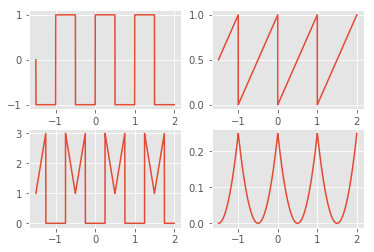

In [45]:
Fs = 10000
func1 = lambda t: (abs((t%1)-0.25) < 0.25).astype(float) - (abs((t%1)-0.75) < 0.25).astype(float)
func2 = lambda t: t % 1
func3 = lambda t: (abs((t%1)-0.5) < 0.25).astype(float) + 8*(abs((t%1)-0.5)) * (abs((t%1)-0.5)<0.25)
func4 = lambda t: ((t%1)-0.5)**2
t = np.arange(-1.5, 2, 1/Fs)
plt.subplot(221); plt.plot(t, func1(t))
plt.subplot(222); plt.plot(t, func2(t))
plt.subplot(223); plt.plot(t, func3(t))
plt.subplot(224); plt.plot(t, func4(t))

In [46]:
def fourierSeries(period, N):
    """Calculate the Fourier series coefficients up to the Nth harmonic"""
    result = []
    T = len(period)
    t = np.arange(T)
    for n in range(N+1):
        an = 2/T*(period * np.cos(2*np.pi*n*t/T)).sum()
        bn = 2/T*(period * np.sin(2*np.pi*n*t/T)).sum()
        result.append((an, bn))
    return np.array(result)